In [3]:
pip install prettify

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install htmltext

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
import pandas as pd
from datetime import date
import pandas as pd
import regex as re
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers
import htmltext

In [6]:
headers = {
    'accept': '*/*',
    'content-type': 'text/html;charset=UTF-8',
    'content-encoding': 'gzip',
    'origin': 'www.zillow.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'
}

In [7]:
url = 'https://www.zillow.com/homes/10023_rb/'
response = requests.get(url)

In [6]:
response.status_code

200

In [8]:
num_listings = 150

rental = False

# initiators listed here
address = []
bedrooms = []
price = []
bathrooms = []
sq_footage = []
h_link = []
days_on_zillow = []
num_views = []
year_built = []

# record when the data is crawled
date_today = date.today()

count = 1

url = 'https://www.zillow.com/manhattan-new-york-ny-10023/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22usersSearchTerm%22%3A%2210023%22%2C%22mapBounds%22%3A%7B%22west%22%3A-73.99686607418823%2C%22east%22%3A-73.96652492581177%2C%22south%22%3A40.76760605031455%2C%22north%22%3A40.785999948592256%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A61637%2C%22regionType%22%3A7%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A15%7D'.format(count)

r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.content, 'html.parser')

crawled_listing = 0

while num_listings > crawled_listing:
    for s1 in soup.find_all('div', {'class': 'list-card-info'}):
        
        try:
            address.append(s1.find('address', {'class': 'list-card-addr'}).text)
        except Exception:
            address.append('N/A')
        try:
            price.append(s1.find('div', {'class': 'list-card-price'}).text)
        except Exception:
            price.append('N/A')
        try:
            h_link.append(s1.find('a', {'class': 'list-card-link list-card-link-top-margin'}).get('href'))
        except Exception:
            h_link.append('N/A')
        
        #House Page
        if h_link[-1] != 'N/A':
            try:
                r1 = requests.get(h_link[-1], headers=headers)
            except Exception:
                days_on_zillow.append('N/A')
                num_views.append('N/A')
                year_built.append('N/A')
                
            s2 = BeautifulSoup(r1.content, 'html.parser')
            link2 = s2.find('div', {'id': 'home-details-content'})
            
            
            try:
                bedrooms.append(link2.find_all('span', {'class': 'hdp__sc-rfpg3m-0 hfjEIQ'})[0].text)
            except Exception:
                bedrooms.append('N/A')
            try:
                bathrooms.append(link2.find_all('span', {'class': 'hdp__sc-rfpg3m-0 hfjEIQ'})[1].text)
            except Exception:
                bathrooms.append('N/A')
            try:
                sq_footage.append(link2.find_all('span', {'class': 'hdp__sc-rfpg3m-0 hfjEIQ'})[2].text)
            except Exception:
                sq_footage.append('N/A')
            try:
                days_on_zillow.append(link2.find_all('div', {'class': 'hdp__sc-1j01zad-1 kuboKK'})[1].text)
            except Exception:
                days_on_zillow.append('N/A')
            try:
                num_views.append(link2.find('div', {'class': 'hdp__sc-1j01zad-1 kuboKK'})[2].text)
            except Exception:
                num_views.append('N/A')
            try:
                year_built.append(link2.find_all('span', {'class': 'Text-c11n-8-53-2__sc-aiai24-0 hdp__sc-1esuh59-3 cvftlt hjZqSR'})[1].text)
            except Exception:
                year_built.append('N/A')

            
        
        

        
        crawled_listing += 1
        if num_listings == crawled_listing:
            break
    count += 1
    r = requests.get(url, headers=headers)

    soup = BeautifulSoup(r.content, 'html.parser')

In [9]:
df = pd.DataFrame(list(zip(address, price, bedrooms, bathrooms, sq_footage, days_on_zillow, num_views, year_built)),
                 columns = ['address', 'price', 'bedrooms', 'bathroom', 'Sq_footage', 'Days on Zillow','num views', 'Year Built'])




In [10]:
df

,address,price,bedrooms,bathroom,Sq_footage,Days on Zillow,num views,Year Built
0,"160 W 66th St APT 52E, New York, NY 10023","$3,698,000",2 bd,3 ba,"1,312 sqft",Time on Zillow54 minutes|Views26|Saves0Magnifi...,N/A,1990
1,"200 Amsterdam Ave APT 30B, New York, NY 10023","$9,100,000",3 bd,4 ba,"2,677 sqft",Time on Zillow1 day|Views43|Saves1Delivering 2...,N/A,2021
2,"200 Amsterdam Ave APT 29A, New York, NY 10023","$15,500,000",4 bd,5 ba,"3,622 sqft",Time on Zillow1 day|Views138|Saves5|Delivering...,N/A,2021
3,"200 Amsterdam Ave APT 27B, New York, NY 10023","$6,880,000",3 bd,4 ba,"2,221 sqft",Time on Zillow1 day|Views89|Saves2|Delivering ...,N/A,2021
4,"200 Amsterdam Ave APT 28A, New York, NY 10023","$9,750,000",4 bd,5 ba,"2,589 sqft",Time on Zillow1 day|Views62|Saves1|Delivering ...,N/A,2021
...,...,...,...,...,...,...,...,...
130,"160 W 66th St APT 52E, New York, NY 10023","$3,698,000",3 bd,4 ba,"2,677 sqft",Time on Zillow1 day|Views43|Saves1Delivering 2...,N/A,2021
131,"200 Amsterdam Ave #3A, New York, NY 10023","$7,975,000",3 bd,4 ba,"2,221 sqft",Time on Zillow1 day|Views89|Saves2Delivering 2...,N/A,2021
132,"200 Amsterdam Ave APT 27B, New York, NY 10023","$6,880,000",1 bd,1 ba,788 sqft,Time on Zillow1 day|Views272|Saves12|Oversized...,N/A,1932
133,"200 Amsterdam Ave APT 29A, New York, NY 10023","$15,500,000",2 bd,2 ba,"1,052 sqft",Time on Zillow1 day|Views211|Saves7Spacious an...,N/A,1969


In [12]:
df['Time_on_Zillow'] = df['Days on Zillow'].str.split('|').str[0]
df['Number_of_Views'] = df['Days on Zillow'].str.split('|').str[1]



In [13]:
df["Time on Zillow"] = df['Time_on_Zillow'].str.split.iloc[-1].str[1]
df["Number of Views"] = df['Number_of_Views'].str.split('s').str[1]

In [14]:
df = df.drop(columns=['Days on Zillow', 'num views', 'Time_on_Zillow', 'Number_of_Views'])

In [15]:
df

,address,price,bedrooms,bathroom,Sq_footage,Year Built,Time on Zillow,Number of Views
0,"160 W 66th St APT 52E, New York, NY 10023","$3,698,000",2 bd,3 ba,"1,312 sqft",1990,54 minutes,26
1,"200 Amsterdam Ave APT 30B, New York, NY 10023","$9,100,000",3 bd,4 ba,"2,677 sqft",2021,1 day,43
2,"200 Amsterdam Ave APT 29A, New York, NY 10023","$15,500,000",4 bd,5 ba,"3,622 sqft",2021,1 day,138
3,"200 Amsterdam Ave APT 27B, New York, NY 10023","$6,880,000",3 bd,4 ba,"2,221 sqft",2021,1 day,89
4,"200 Amsterdam Ave APT 28A, New York, NY 10023","$9,750,000",4 bd,5 ba,"2,589 sqft",2021,1 day,62
...,...,...,...,...,...,...,...,...
130,"160 W 66th St APT 52E, New York, NY 10023","$3,698,000",3 bd,4 ba,"2,677 sqft",2021,1 day,43
131,"200 Amsterdam Ave #3A, New York, NY 10023","$7,975,000",3 bd,4 ba,"2,221 sqft",2021,1 day,89
132,"200 Amsterdam Ave APT 27B, New York, NY 10023","$6,880,000",1 bd,1 ba,788 sqft,1932,1 day,272
133,"200 Amsterdam Ave APT 29A, New York, NY 10023","$15,500,000",2 bd,2 ba,"1,052 sqft",1969,1 day,211


In [18]:
df.to_csv('Zillow_CrawlingFinal.csv', index = False)

In [26]:
import matplotlib.pyplot as plt

In [16]:
df_copy = pd.DataFrame(list(zip(address, price, bedrooms, bathrooms, sq_footage, days_on_zillow, year_built)),
                 columns = ['address', 'price', 'bedrooms', 'bathroom', 'Sq_footage', 'Days on Zillow','Year Built'])

In [17]:
df_copy['price'].apply(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
130    <class 'str'>
131    <class 'str'>
132    <class 'str'>
133    <class 'str'>
134    <class 'str'>
Name: price, Length: 135, dtype: object

In [18]:
df_copy['price'] = df_copy['price'].str.replace(',','')
df_copy['price'] = df_copy['price'].str.replace('$','')
df_copy['price']

0       3698000
1       9100000
2      15500000
3       6880000
4       9750000
         ...   
130     3698000
131     7975000
132     6880000
133    15500000
134     9100000
Name: price, Length: 135, dtype: object

In [19]:
df_copy['price'] = df_copy['price'].str.replace('+','')
df_copy['price'] = df_copy['price'].str.replace('N/A','0')

In [20]:
df_copy['price'] = df_copy['price'].astype('float')

In [21]:
df_copy['price']

0       3698000.0
1       9100000.0
2      15500000.0
3       6880000.0
4       9750000.0
          ...    
130     3698000.0
131     7975000.0
132     6880000.0
133    15500000.0
134     9100000.0
Name: price, Length: 135, dtype: float64

In [22]:
meanPrice_by_beds = df_copy.groupby('bedrooms', as_index=False)['price'].mean()

In [23]:
meanPrice_by_beds

,bedrooms,price
0,-- bd,5.189133e+06
1,1 bd,6.079500e+06
2,2 bd,5.338917e+06
3,3 bd,6.555600e+06
4,4 bd,6.156517e+06
5,5 bd,4.761000e+06


In [24]:
meanPrice_by_beds['bedrooms'].apply(type)

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
5    <class 'str'>
Name: bedrooms, dtype: object

In [28]:
meanPrice_by_beds['price'].apply(type)

0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
4    <class 'float'>
5    <class 'float'>
Name: price, dtype: object

Text(0.5, 1.0, 'Average House price by number of bedrooms')

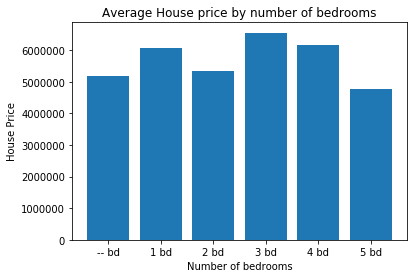

In [27]:
plt.bar(meanPrice_by_beds.bedrooms, meanPrice_by_beds.price)
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price")
plt.title("Average House price by number of bedrooms")

In [345]:
meanPrice_by_baths = df_copy.groupby('bathroom', as_index=False)['price'].mean()

Text(0.5, 1.0, 'Average House price by number of bathrooms')

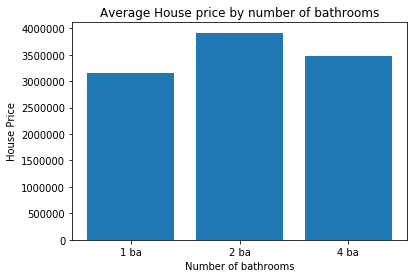

In [348]:
plt.bar(meanPrice_by_baths.bathroom, meanPrice_by_baths.price)
plt.xlabel("Number of bathrooms")
plt.ylabel("House Price")
plt.title("Average House price by number of bathrooms")

In [324]:
price_list = []
price_list = df_copy['price'].astype('float').mean()

In [325]:
price_list

3433166.6666666665

In [323]:
price_list_mean = price_list.mean()
price_list_mean

3433166.6666666665

In [309]:
#df[['bedrooms','bathrooms','sq_footage']] = df.bedrooms.str.split(expand=True)